In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
def calculate_quality(instance, algorithm, best_score):
    df = pd.read_csv(instance + '_' + algorithm + '.csv', sep=' ')

    score_array = np.array(df.iloc[:, -4])

    times = np.array(df.iloc[:, -3])

    steps = np.array(df.iloc[:, -2])

    evaluations = np.array(df.iloc[:, -1])

    quality_array = score_array / best_score

    efficiency = quality_array * times
    
    return round(np.mean(quality_array), 3), round(np.std(quality_array), 3), round(np.min(quality_array), 3), round(np.mean(times)), round(np.mean(steps)), round(np.mean(evaluations)), round(np.mean(efficiency))


In [ ]:
instances = ['berlin52', 'ch150', 'kroA200', 'a280', 'fl417', 'pr439', 'd657', 'rat783']
algorithms = ['rs', 'rw', 'h', 'greedy', 'steepest']
best_scores = {'a280': 2579, 'rat783': 8806, 'berlin52': 7542, 'ch150':  6528, 'd657': 48912, 'fl417': 11861, 'kroA200': 29368, 'pr439': 107217}

for ins in instances:
    print('===========================================================================')
    print(ins)
    print("{: >10} {: >10} {: >10} {: >10} {: >10} {: >10} {: >10} {: >10}".format('','MEAN', 'STD', 'BEST', 'TIMES', 'STEPS', 'EVALUATIONS', 'EFFICIENCY'))
    for alg in algorithms:
        miu, sigma, best, times, steps, evaluations, efficiency = calculate_quality(ins, alg, best_scores[ins])
        print("{: >10} {: >10} {: >10} {: >10} {: >10} {: >10} {: >10} {: >10}".format(alg, miu, sigma, best, times, steps, evaluations, efficiency))
    print('===========================================================================')
    print()

berlin52
                 MEAN        STD       BEST      TIMES      STEPS EVALUATIONS EFFICIENCY
        rs      3.279      0.119      3.064        462        411        411       1505
        rw      3.202      0.084      3.035        462       6402       6402       1481
         h      1.312      0.042      1.227          5       1326       1326          6
    greedy       1.08      0.028      1.039        369        176     107093        397
  steepest      1.083      0.041        1.0        462         44     117572        499

ch150
                 MEAN        STD       BEST      TIMES      STEPS EVALUATIONS EFFICIENCY
        rs      7.216      0.123      6.939      10404       4526       4526      75120
        rw      7.123      0.126      6.928      10404      57263      57263      74067
         h       1.16      0.033      1.087         28      11175      11175         32
    greedy      1.073       0.01      1.058      13405        677    4603948      14367
  steepest    

In [ ]:
a280_steepest_score = np.array(pd.read_csv('a280_steepest_500.csv', sep=' ').iloc[:, -4])
a280_quality_array_steepest = a280_steepest_score / 2579
a280_greedy_score = np.array(pd.read_csv('a280_greedy_500.csv', sep=' ').iloc[:, -4])
a280_quality_array_greedy = a280_greedy_score / 2579

ch150_steepest_score = np.array(pd.read_csv('ch150_steepest_500.csv', sep=' ').iloc[:, -4])
ch150_quality_array_steepest = ch150_steepest_score / 6528
ch150_greedy_score = np.array(pd.read_csv('ch150_greedy_500.csv', sep=' ').iloc[:, -4])
ch150_quality_array_greedy = ch150_greedy_score / 6528


In [ ]:
def plot_so_far(scores, output_filename, title):
    # Calculate the best solution so far
    best_so_far = np.minimum.accumulate(scores)
    
    # Calculate the average so far
    cumulative_sum = np.cumsum(scores)
    average_so_far = cumulative_sum / (np.arange(scores.size) + 1)
    
    # Plot the best solution so far and average so far
    plt.figure(figsize=(10, 6))
    plt.plot(best_so_far, label="Best Solution So Far")
    plt.plot(average_so_far, label="Average So Far")
    
    # Add title, labels, and legend
    plt.title(title)
    plt.xlabel("Iterations")
    plt.ylabel("Quality")
    plt.legend()
    
    # Save the plot as a PDF file
    plt.savefig(output_filename)
    plt.show()

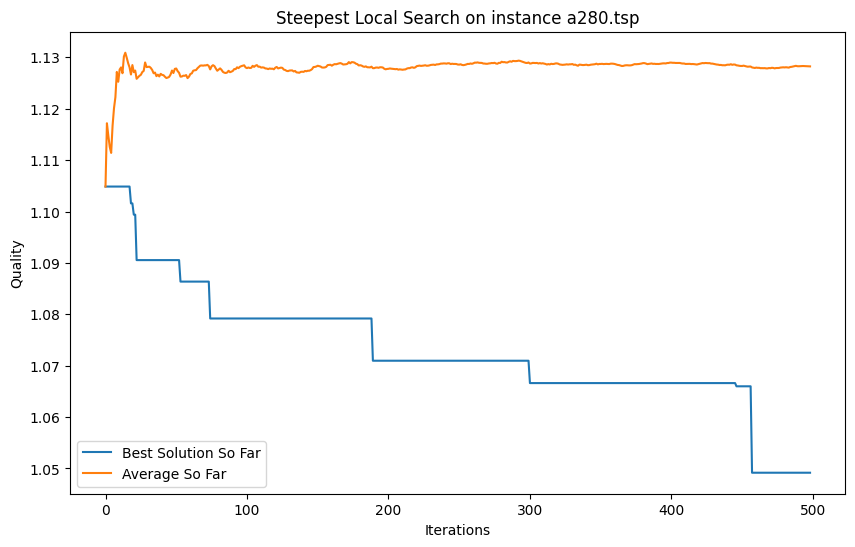

In [ ]:
plot_so_far(a280_quality_array_steepest, 'a280_sofar_steepest.pdf', 'Steepest Local Search on instance a280.tsp')

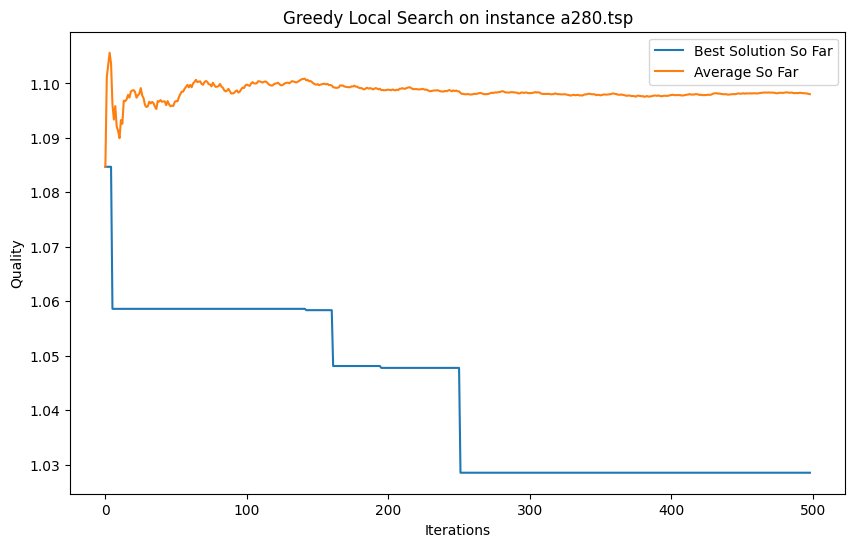

In [ ]:
plot_so_far(a280_quality_array_greedy, 'a280_sofar_greedy.pdf', 'Greedy Local Search on instance a280.tsp')

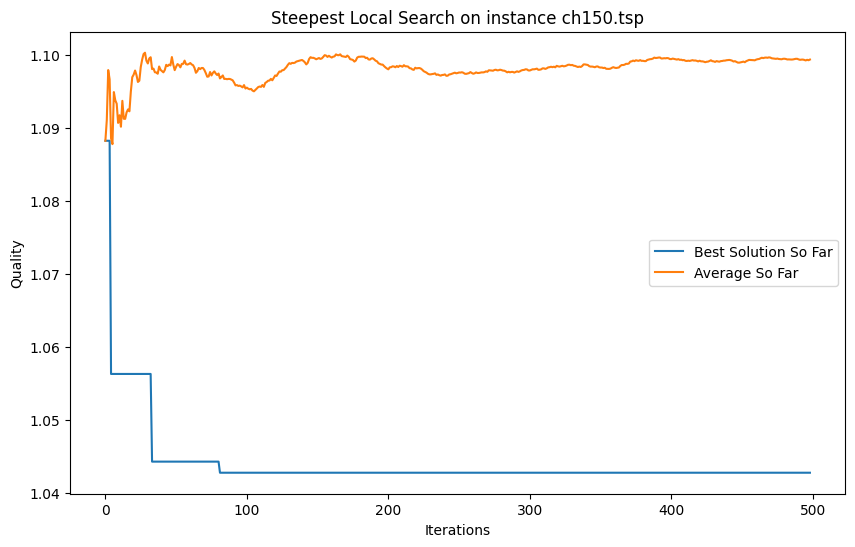

In [ ]:
plot_so_far(ch150_quality_array_steepest, 'ch150_sofar_steepest.pdf', 'Steepest Local Search on instance ch150.tsp')

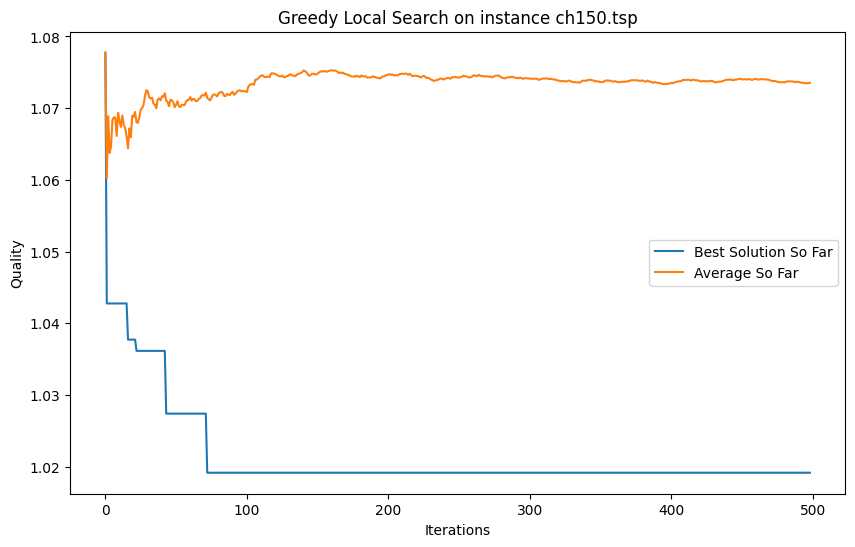

In [ ]:
plot_so_far(ch150_quality_array_greedy, 'ch150_sofar_greedy.pdf', 'Greedy Local Search on instance ch150.tsp')

In [ ]:
a280_steepest_score_init = np.array(pd.read_csv('a280_steepest_500.csv', sep=' ').iloc[:, -5])
a280_quality_array_steepest_init = a280_steepest_score_init / 2579
a280_greedy_score_init = np.array(pd.read_csv('a280_greedy_500.csv', sep=' ').iloc[:, -5])
a280_quality_array_greedy_init = a280_greedy_score_init / 2579

ch150_steepest_score_init = np.array(pd.read_csv('ch150_steepest_500.csv', sep=' ').iloc[:, -5])
ch150_quality_array_steepest_init = ch150_steepest_score_init / 6528
ch150_greedy_score_init = np.array(pd.read_csv('ch150_greedy_500.csv', sep=' ').iloc[:, -5])
ch150_quality_array_greedy_init = ch150_greedy_score_init / 6528

In [ ]:
from scipy.stats import linregress, spearmanr

def plot_init_final(x, y, output_filename, title, xlab='Quality of initial solutiion', ylab='Quality of final solution'):
    # Calculate the linear regression (correlation line) coefficients
    slope, intercept, _, _, _ = linregress(x, y)

    # Create the correlation line's x and y values
    line_x = np.linspace(min(x), max(x), 100)
    line_y = slope * line_x + intercept

    # Calculate the Spearman correlation coefficient
    spearmanr_cor, _ = spearmanr(x, y)

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Data points')

    plt.plot(line_x, line_y, color='red', label='Correlation line')

    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title+f' Spearman correlation: {spearmanr_cor:.2f}')
    plt.legend()

    plt.savefig(output_filename)
    plt.show()

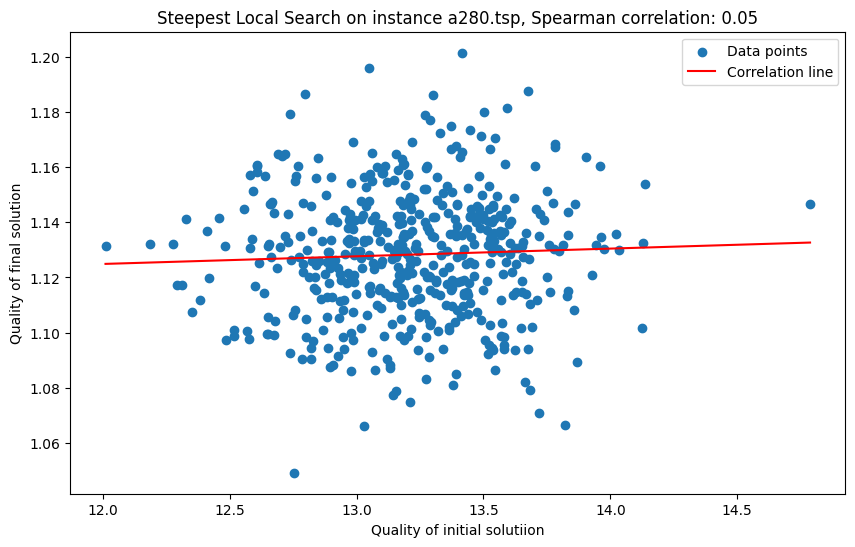

In [ ]:
plot_init_final(a280_quality_array_steepest_init, a280_quality_array_steepest, 'a280_steepest_cor.pdf', 'Steepest Local Search on instance a280.tsp,')

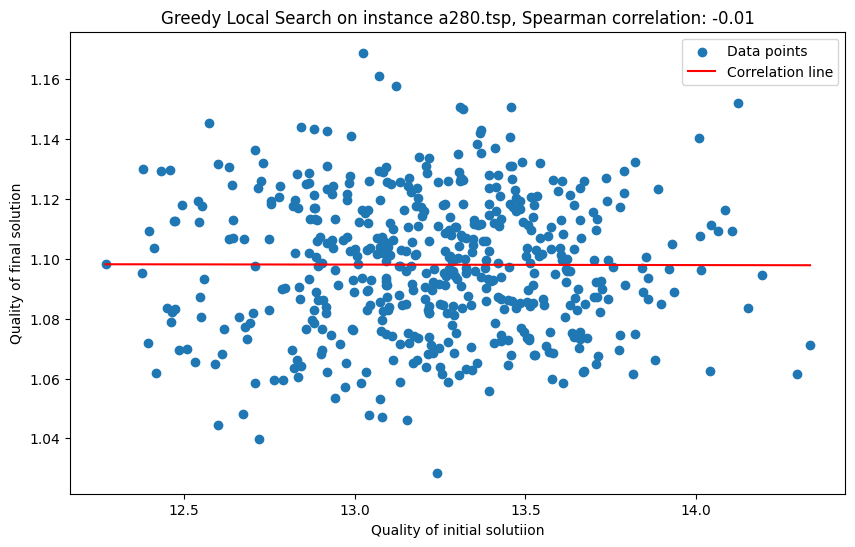

In [ ]:
plot_init_final(a280_quality_array_greedy_init, a280_quality_array_greedy, 'a280_greedy_cor.pdf', 'Greedy Local Search on instance a280.tsp,')

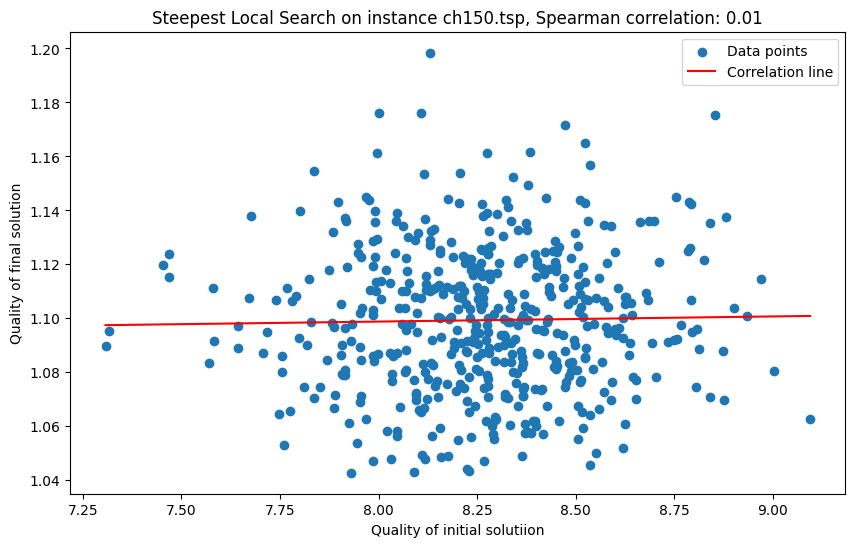

In [ ]:
plot_init_final(ch150_quality_array_steepest_init, ch150_quality_array_steepest, 'ch150_steepest_cor.pdf', 'Steepest Local Search on instance ch150.tsp,')

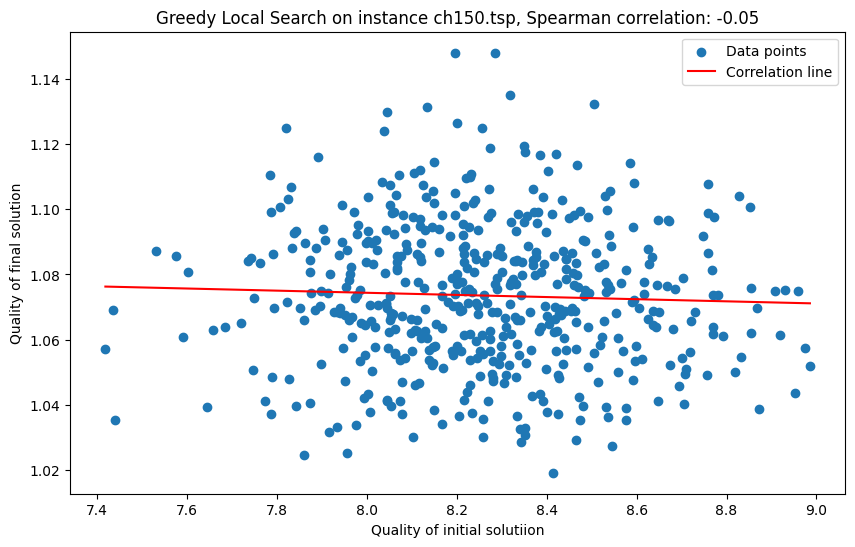

In [ ]:
plot_init_final(ch150_quality_array_greedy_init, ch150_quality_array_greedy, 'ch150_greedy_cor.pdf', 'Greedy Local Search on instance ch150.tsp,')

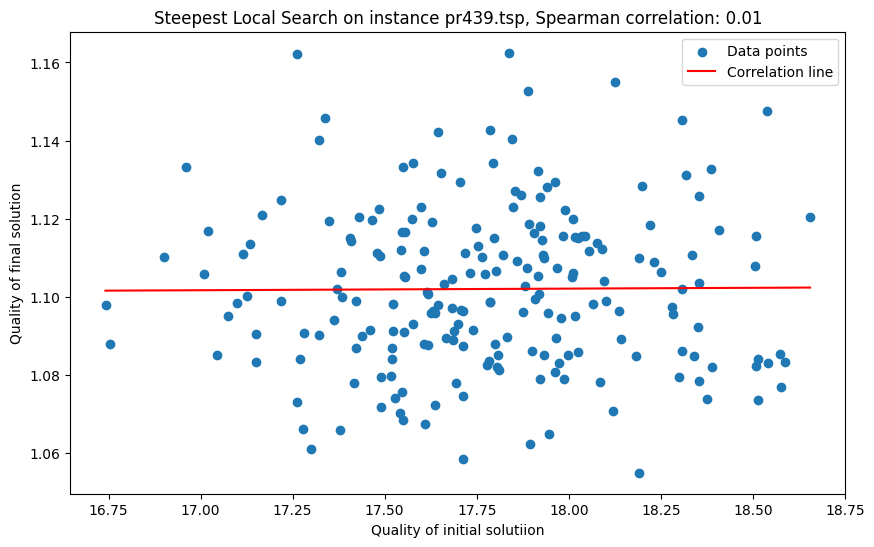

In [ ]:
filename = 'pr439_steepest_cor.csv'
a = np.array(pd.read_csv(filename, sep=' ').iloc[:, -5]) / 107217
b = np.array(pd.read_csv(filename, sep=' ').iloc[:, -4]) / 107217
plot_init_final(a, b, 'pr439_steepest_cor.pdf', 'Steepest Local Search on instance pr439.tsp,')

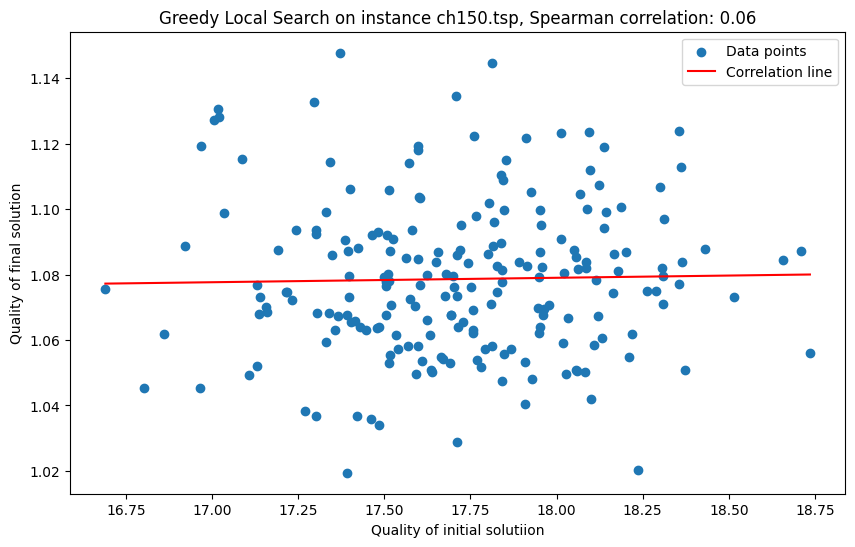

In [ ]:
filename = 'pr439_greedy_cor.csv'
a = np.array(pd.read_csv(filename, sep=' ').iloc[:, -5]) / 107217
b = np.array(pd.read_csv(filename, sep=' ').iloc[:, -4]) / 107217
plot_init_final(a, b, 'pr439_greedy_cor.pdf', 'Greedy Local Search on instance ch150.tsp,')

In [ ]:
def load_opt(filename, start=4):
    with open(filename, 'r') as f:
        lines = f.readlines()[start:]
    data = np.array([list(map(float, line.strip().split(',')))[0] for line in lines]).astype(int)[:-1]
    return data

In [ ]:
def edge_similarity(solution_1, solution_2):
    if len(solution_1) != len(solution_2):
        raise ValueError("Solutions must have the same length")

    def create_edges(solution):
        edges = set()
        for i in range(len(solution) - 1):
            edge = tuple(sorted((solution[i], solution[i + 1])))
            edges.add(edge)
        edges.add(tuple(sorted((solution[-1], solution[0]))))
        return edges

    edges_1 = create_edges(solution_1)
    edges_2 = create_edges(solution_2)

    intersection = edges_1.intersection(edges_2)
    similarity = len(intersection) / len(edges_1)
    return similarity

In [ ]:
def plot_similarity(opt_file, sol_file, out_file, title, best_score, start_opt=4):
    opt_sol = load_opt(opt_file, start_opt)
    solutions = np.array(pd.read_csv(sol_file, sep=' '))[:,:-5].astype(int) + 1
    qualities = np.array(pd.read_csv(sol_file, sep=' ').iloc[:, -4]) / best_score
    similarities = []
    for sol in solutions:
        similarity = edge_similarity(opt_sol, sol)
        similarities.append(similarity)
    similarities = np.array(similarities)
    
    plot_init_final(qualities, similarities, out_file, title, ylab='Similarity', xlab='Quality')

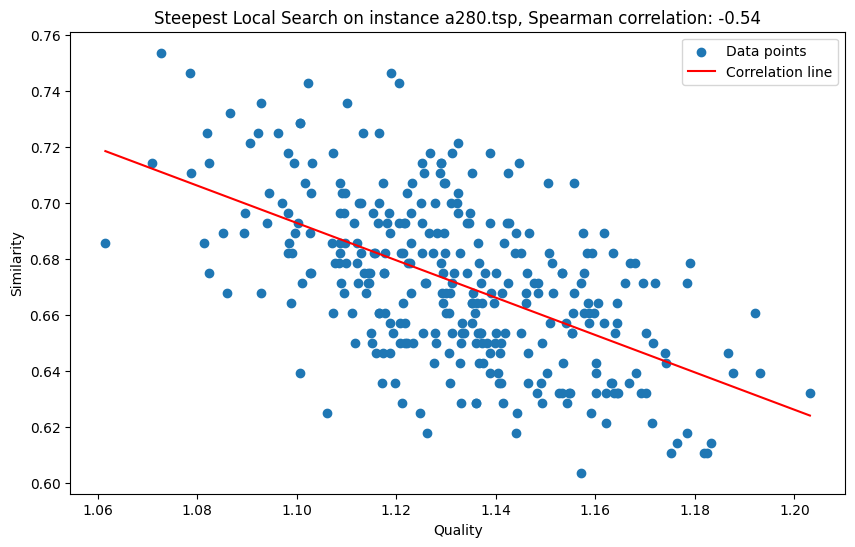

In [ ]:
plot_similarity('a280.opt.tour', 'a280_steepest_300.csv', 'a280_steepest_sim.pdf', 'Steepest Local Search on instance a280.tsp,', 2579)

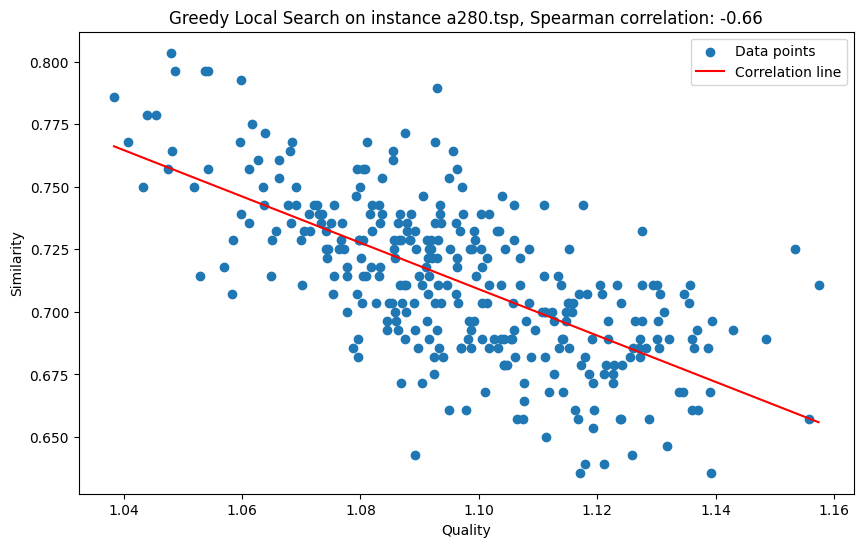

In [ ]:
plot_similarity('a280.opt.tour', 'a280_greedy_300.csv', 'a280_greedy_sim.pdf', 'Greedy Local Search on instance a280.tsp,', 2579)

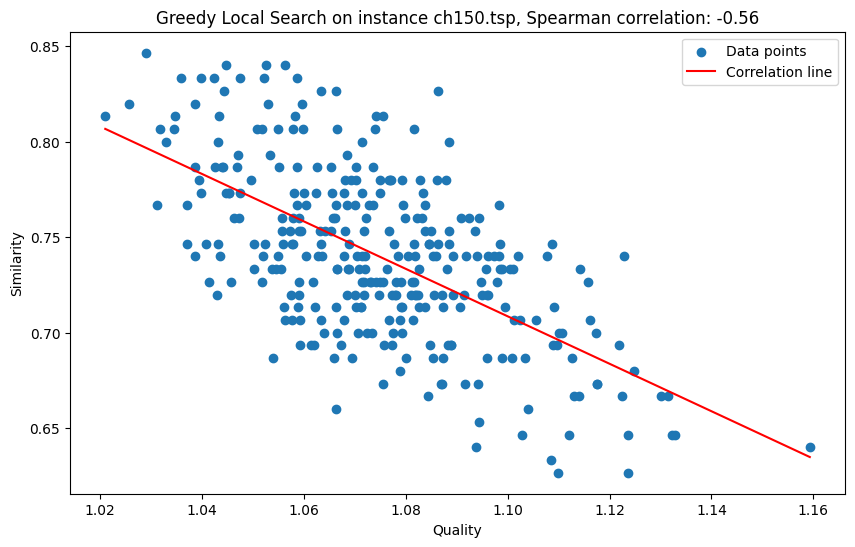

In [ ]:
plot_similarity('ch150.opt.tour', 'ch150_greedy_300.csv', 'ch150_greedy_sim.pdf', 'Greedy Local Search on instance ch150.tsp,', 6528, 5)

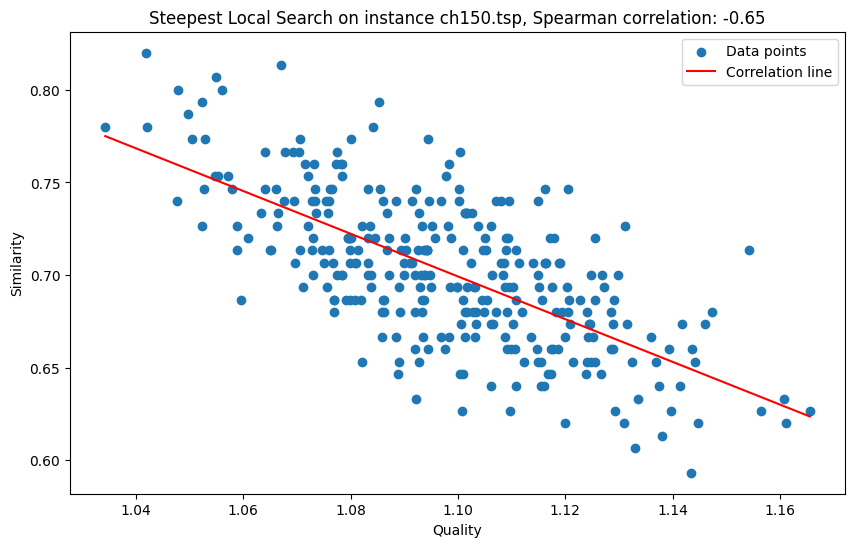

In [ ]:
plot_similarity('ch150.opt.tour', 'ch150_steepest_300.csv', 'ch150_steepest_sim.pdf', 'Steepest Local Search on instance ch150.tsp,', 6528, 5)